In [1]:
#Analysing
import pandas as pd, numpy as np

#Visualization
import matplotlib.pyplot as plt, seaborn as sns

#Ignoring warnings
import warnings
warnings.filterwarnings(action='ignore')

#View settings
pd.set_option('display.max_rows', 1000)

In [2]:
app = pd.read_csv('application_data.csv')   #Loan Application Data
prev = pd.read_csv('previous_application.csv')   #Previous Application Data

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [5]:
app.shape

(307511, 122)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
app.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
col_40null = app.columns[app.isnull().mean()*100>40]
app.drop(columns=col_40null, inplace=True)

In [11]:
app.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [12]:
app.AMT_ANNUITY = app.AMT_ANNUITY.fillna(app.AMT_ANNUITY.median())

In [13]:
AMT_GOODS_PRICE_NAN=1-((app['AMT_CREDIT']/app['AMT_GOODS_PRICE'])-1).mean()
AMT_GOODS_PRICE_NAN*100

87.70048282953486

In [14]:
app['AMT_GOODS_PRICE']=app['AMT_GOODS_PRICE'].fillna(app['AMT_CREDIT']*AMT_GOODS_PRICE_NAN)

In [15]:
app.NAME_TYPE_SUITE = app.NAME_TYPE_SUITE.fillna(app.NAME_TYPE_SUITE.mode()[0])

In [16]:
for i in ['EXT_SOURCE_2', 'CNT_FAM_MEMBERS','EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    app[i] = app[i].fillna(app[i].median())

In [17]:
app.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [18]:
app.OCCUPATION_TYPE = app.OCCUPATION_TYPE.fillna(app.OCCUPATION_TYPE.mode()[0])

In [19]:
app['TARGET_PERCENT'] = app.TARGET.apply(lambda x: 100 if x==1 else 0)
app1 = app.copy()

In [20]:
app.isna().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [21]:
app['CONTACT_INFO'] = app[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']].sum(axis=1)
app = app.drop(columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'])

In [22]:
app['REGION_RATING'] = app[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].mean(axis=1) 
app = app.drop(columns = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'])

In [23]:
app['PERCENTAGE_ADDRESS_MATCH'] = (app[['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']].mean(axis=1))*100 
app['PERCENTAGE_ADDRESS_MATCH'] = 100 - app.PERCENTAGE_ADDRESS_MATCH 
app = app.drop(columns = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'])

In [24]:
app['EXT_SOURCE'] = app[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1) 
app = app.drop(columns = ['EXT_SOURCE_2', 'EXT_SOURCE_3'])

In [25]:
app.columns.get_loc('FLAG_DOCUMENT_2')

31

In [26]:
app.columns.get_loc('FLAG_DOCUMENT_21')

50

In [27]:
FLAG_DOCS = list(app.columns)[31:51] 
app['TOTAL_DOCS_GIVEN'] = app[FLAG_DOCS].sum(axis=1) 
app = app.drop(columns = FLAG_DOCS)

In [28]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,CONTACT_INFO,REGION_RATING,PERCENTAGE_ADDRESS_MATCH,EXT_SOURCE,TOTAL_DOCS_GIVEN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,100,4,2.0,100.000000,0.201162,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0,4,1.0,100.000000,0.578761,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0,5,2.0,100.000000,0.642739,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,0,3,2.0,100.000000,0.592859,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0,3,2.0,66.666667,0.429007,1


In [29]:
app.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [30]:
app['AGE']=(round(app['DAYS_BIRTH']/365))*-1
app=app.drop(columns=['DAYS_BIRTH'])

In [31]:
app.DAYS_REGISTRATION = app.DAYS_REGISTRATION.apply(lambda x: x*-1)

In [32]:
app.DAYS_LAST_PHONE_CHANGE = app.DAYS_LAST_PHONE_CHANGE.apply(lambda x: x*-1)

In [33]:
app['REPAYER_OR_DEFAULTER'] = app.TARGET.apply(lambda x: 'Repayer' if x==0 else 'Defaulter')

In [34]:
app_continous = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING', 'EXT_SOURCE', 'TOTAL_DOCS_GIVEN', 'AGE']
app_categorical=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CONTACT_INFO', 'PERCENTAGE_ADDRESS_MATCH']

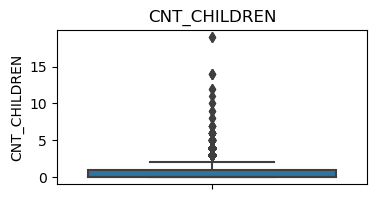

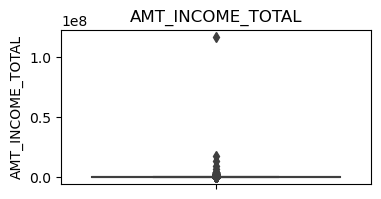

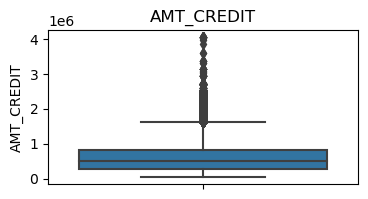

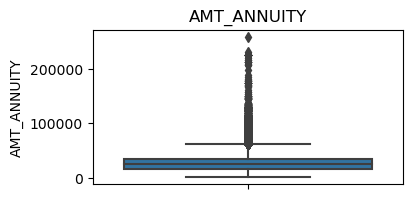

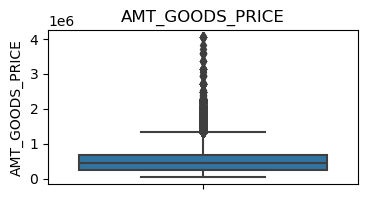

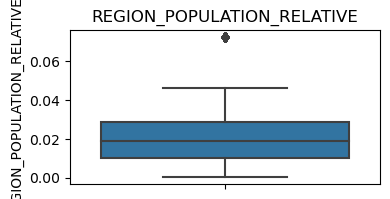

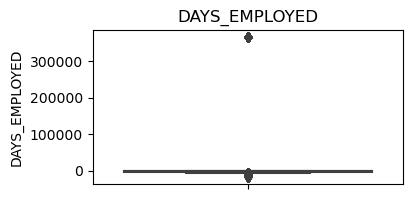

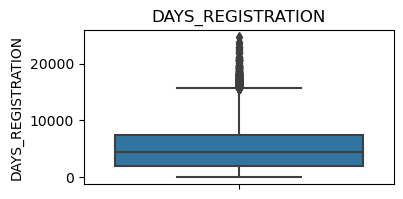

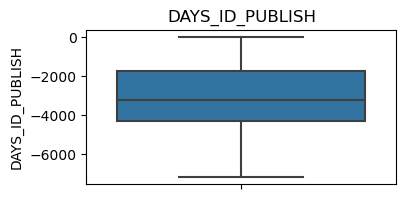

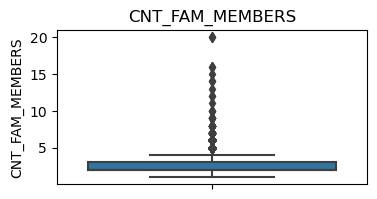

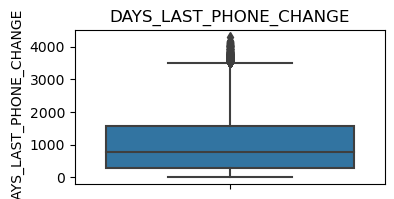

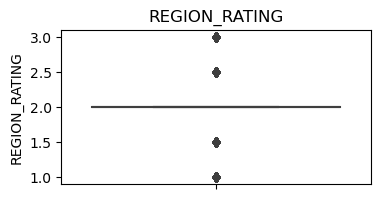

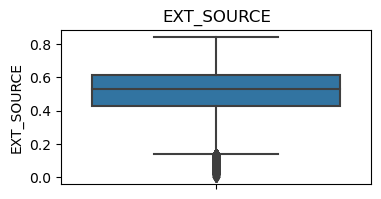

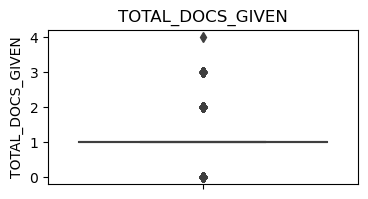

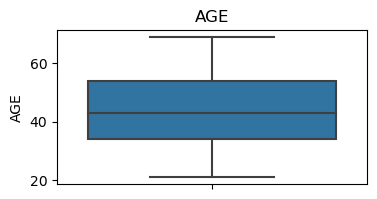

In [35]:
for i in app_continous: 
    plt.figure(figsize=(4,2)) 
    sns.boxplot(y=app[i]) 
    plt.title(i) 
    plt.show()

In [36]:
rat = app.REPAYER_OR_DEFAULTER.value_counts(normalize=True)*100
rat

REPAYER_OR_DEFAULTER
Repayer      91.927118
Defaulter     8.072882
Name: proportion, dtype: float64

In [37]:
rat[0]/rat[1]

11.387150050352469

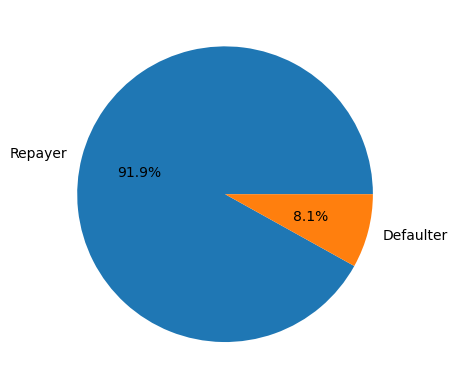

In [38]:
plt.pie(rat, labels=rat.index, autopct='%1.1f%%')
plt.show()

In [39]:
def app_univariate_categorical(x):

    # Combine value_counts and groupby in a single step
    group_data = app.groupby(x).agg(Value_Counts=('TARGET', 'size'), Defaulters=('TARGET', 'sum')).reset_index()

    # Calculate percentage of defaulters
    group_data['Percentage_Defaulters'] = (group_data['Defaulters'] / group_data['Value_Counts']) * 100

    # Sort by Percentage_Defaulters
    group_data.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

    # Create a single figure with two subplots to avoid redundant figure creation
    plt.figure(figsize=(10,5))

    # First subplot: Barplot of Percentage Defaulters
    plt.subplot(1, 2, 1)
    sns.barplot(data=group_data, x=x, y='Percentage_Defaulters', color='Red')
    plt.title(f'% of Defaulters in each category ({x})')

    # Second subplot: Countplot of categories with hue on REPAYER_OR_DEFAULTER
    plt.subplot(1, 2, 2)
    sns.countplot(data=app, x=x, hue='REPAYER_OR_DEFAULTER', palette=['Red', 'Green'])
    plt.title(x)

    # Show the combined plot
    plt.tight_layout()
    plt.show()

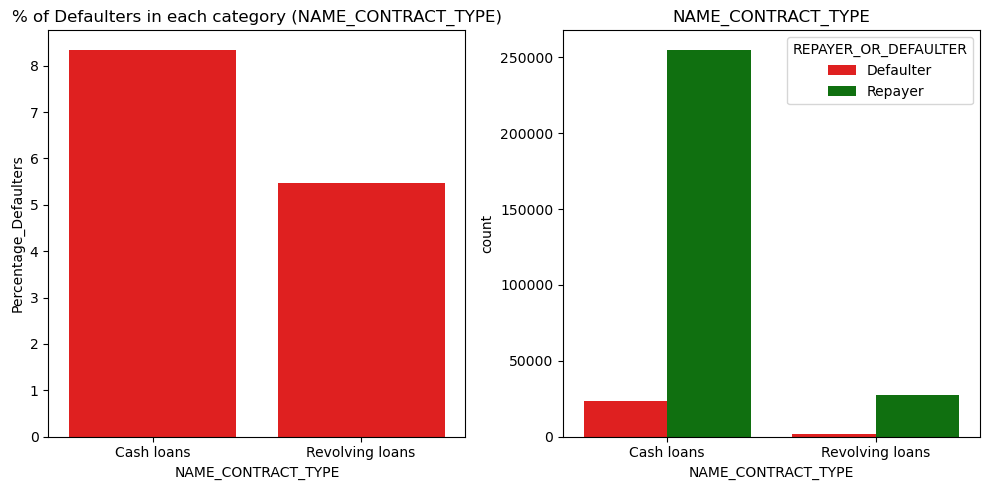

In [40]:
app_univariate_categorical('NAME_CONTRACT_TYPE')

In [41]:
app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [42]:
app['CODE_GENDER'] = app['CODE_GENDER'].apply(lambda x: "Female" if x=='F' else "Male" if x=='M' else np.nan)

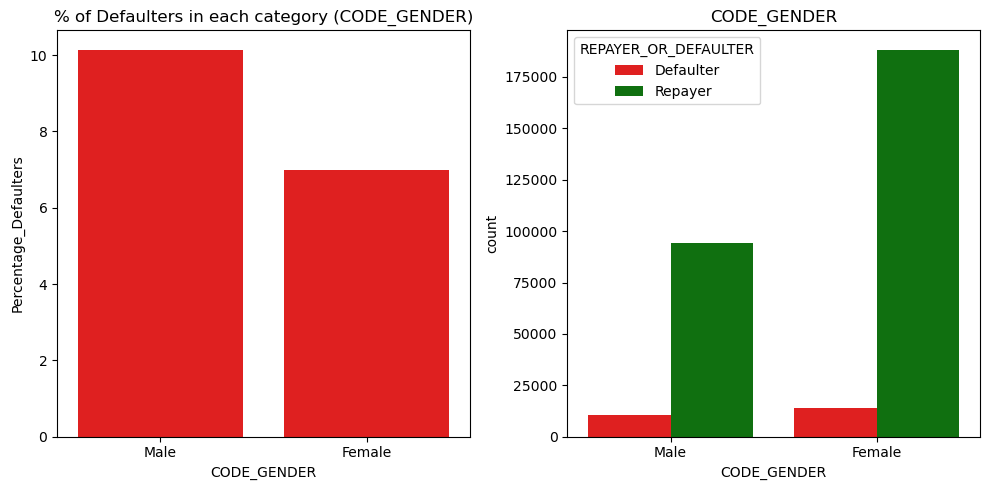

In [43]:
app_univariate_categorical('CODE_GENDER')

In [44]:
app[app['AGE']<20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,CONTACT_INFO,REGION_RATING,PERCENTAGE_ADDRESS_MATCH,EXT_SOURCE,TOTAL_DOCS_GIVEN,AGE,REPAYER_OR_DEFAULTER


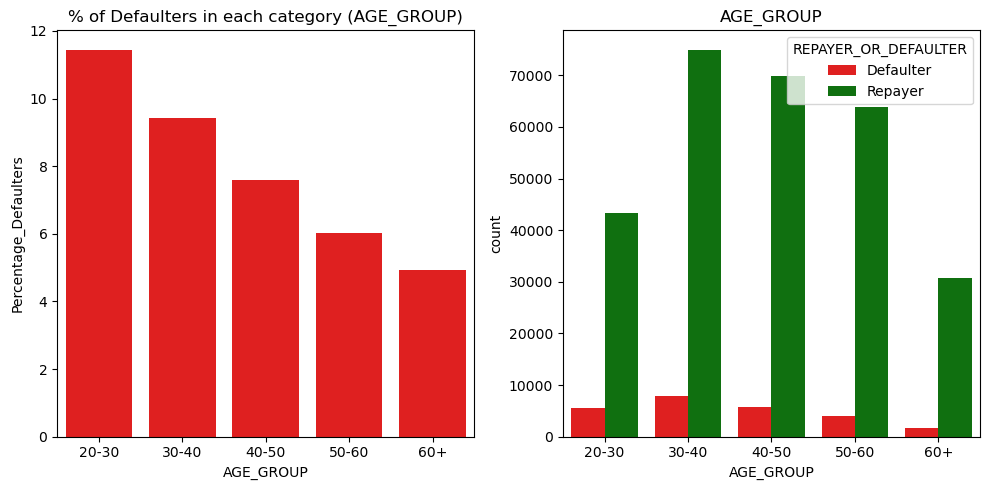

In [45]:
app['AGE_GROUP'] = pd.cut(app['AGE'], [20,30,40,50,60,999], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
app_univariate_categorical('AGE_GROUP')

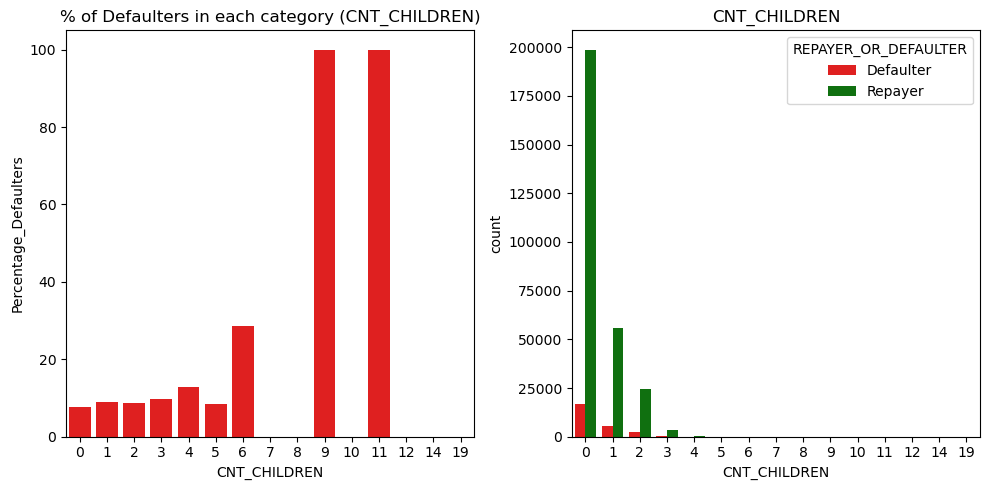

In [46]:
app_univariate_categorical('CNT_CHILDREN')